<a href="https://colab.research.google.com/github/AnandHegden/Areca_Prediction/blob/main/ArecaProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Areca_data.csv to Areca_data.csv
Dataset loaded. Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price', 'Commodity_Code']
Enter market name (exact as in dataset): Sirsi
Enter variety name (exact as in dataset): Chali
Enter days into future for prediction: 5


/tmp/ipython-input-3415414297.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Arrival_Date'] = pd.to_datetime(filtered_df['Arrival_Date'], dayfirst=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/iav2tuve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/4v43udz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43953', 'data', 'file=/tmp/tmp6ye9zriv/iav2tuve.json', 'init=/tmp/tmp6ye9zriv/4v43udz_.json', 'output', 'file=/tmp/tmp6ye9zriv/prophet_model4808ms7i/prophet_m

Predicted Modal Price on 2030-08-06: ₹35464.17


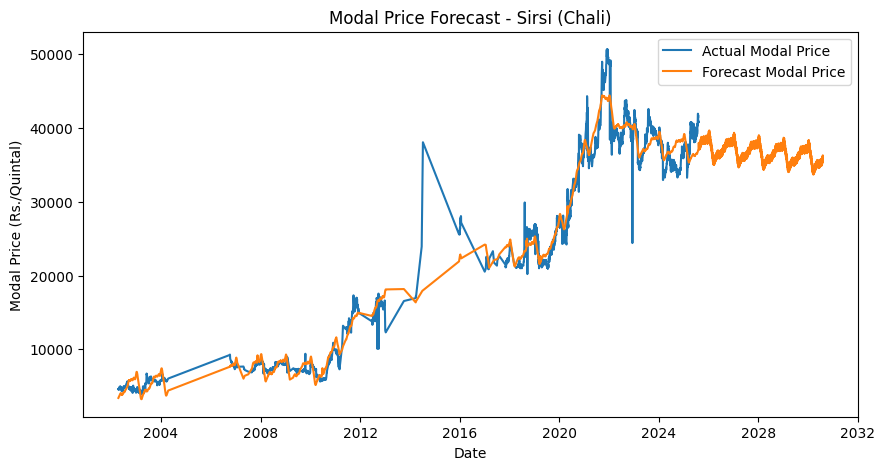

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/isehwus0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/u2821kfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88700', 'data', 'file=/tmp/tmp6ye9zriv/isehwus0.json', 'init=/tmp/tmp6ye9zriv/u2821kfw.json', 'output', 'file=/tmp/tmp6ye9zriv/prophet_modele4vxwbr5/prophet_model-20250810151247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicted Minimum Price on 2030-08-06: ₹32901.65


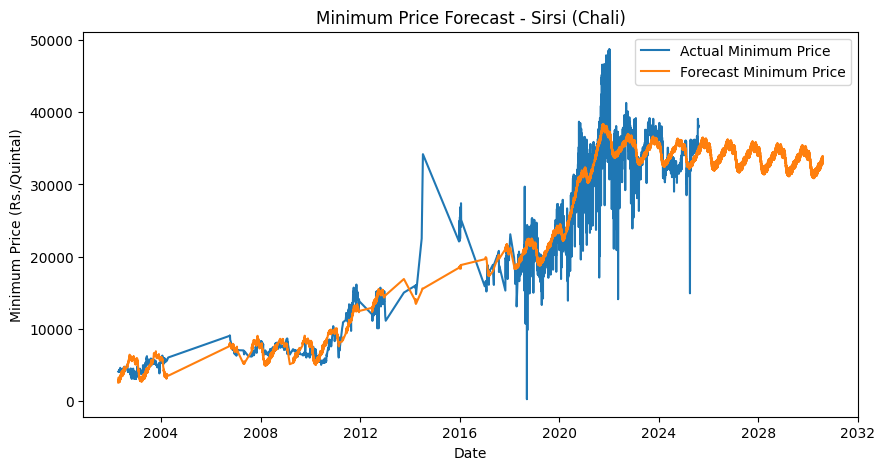

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/_d8i51ni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ye9zriv/un_vxngi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10674', 'data', 'file=/tmp/tmp6ye9zriv/_d8i51ni.json', 'init=/tmp/tmp6ye9zriv/un_vxngi.json', 'output', 'file=/tmp/tmp6ye9zriv/prophet_modelwat8119b/prophet_model-20250810151250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicted Maximum Price on 2030-08-06: ₹40760.63


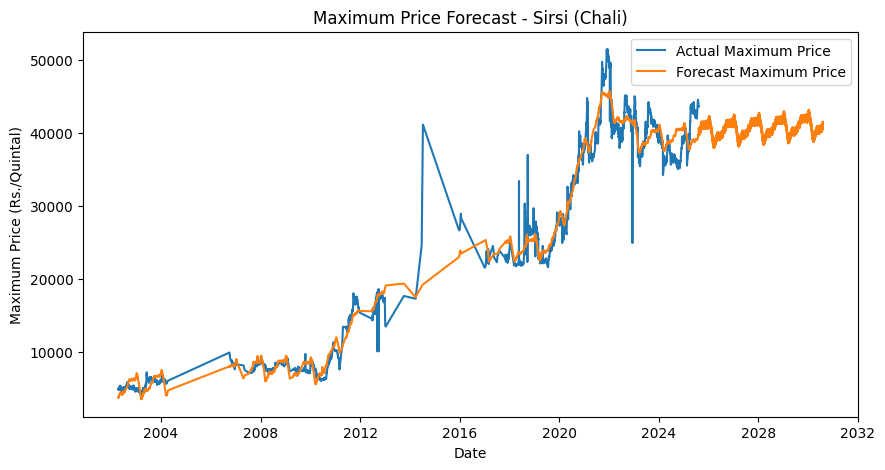

In [ ]:
!pip install prophet pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from google.colab import files

# -------------------------
# 1. Upload and load dataset
# -------------------------
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("Dataset loaded. Columns:", df.columns.tolist())

# -------------------------
# 2. User inputs
# -------------------------
market_name = input("Enter market name (exact as in dataset): ").strip()
variety_name = input("Enter variety name (exact as in dataset): ").strip()
future_days = int(input("Enter days into future for prediction: "))

# -------------------------
# 3. Filter dataset for user inputs
# -------------------------
filtered_df = df[
    (df['Market'].str.strip().str.lower() == market_name.lower()) &
    (df['Variety'].str.strip().str.lower() == variety_name.lower())
]

if filtered_df.empty:
    raise ValueError(f"No data found for market '{market_name}' and variety '{variety_name}'.")

# Ensure date column is datetime
filtered_df['Arrival_Date'] = pd.to_datetime(filtered_df['Arrival_Date'], dayfirst=True)

# -------------------------
# 4. Forecasting function
# -------------------------
def forecast_price(price_column_name, label):
    price_df = filtered_df[['Arrival_Date', price_column_name]].copy()
    price_df.columns = ["ds", "y"]
    price_df = price_df.dropna().sort_values("ds")

    if price_df.shape[0] < 2:
        print(f"Not enough data to predict {label}.")
        return None

    model = Prophet(yearly_seasonality=True)
    model.fit(price_df)

    future = model.make_future_dataframe(periods=365*future_days)
    forecast = model.predict(future)

    predicted_value = forecast.iloc[-1]['yhat']
    print(f"Predicted {label} on {future.iloc[-1]['ds'].date()}: ₹{predicted_value:.2f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(price_df['ds'], price_df['y'], label=f"Actual {label}")
    plt.plot(forecast['ds'], forecast['yhat'], label=f"Forecast {label}")
    plt.xlabel("Date")
    plt.ylabel(f"{label} (Rs./Quintal)")
    plt.title(f"{label} Forecast - {market_name.title()} ({variety_name.title()})")
    plt.legend()
    plt.show()

# -------------------------
# 5. Run forecasts for all prices
# -------------------------
forecast_price('Modal_Price', "Modal Price")
forecast_price('Min_Price', "Minimum Price")
forecast_price('Max_Price', "Maximum Price")
